In [2]:
# Import Libreary
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Data Set
test_data = pd.read_csv("Downloads/test.csv")
train_data = pd.read_csv("Downloads/train.csv")

In [5]:
train_data.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [6]:
test_data.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [7]:
# Check the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       80 non-null     int64  
 1   time     80 non-null     object 
 2   feature  80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [8]:
#Design the regex for date extraction 
#2019-03-19 00:00:10 ----Year(4digit)-Month(2digit)-Day(2digit) hour(2digit):min(2digit):second(2digit)
##                       %Y-%m-%d %H:%M:%S              

from pandas import datetime
def parserToTimeDatatype(time):
    return datetime.strptime(time,"%Y-%m-%d %H:%M:%S")

In [10]:
# Convert The time to Date Time format

finalData = pd.read_csv('Downloads/train.csv',
                       parse_dates = [1], #Specify which column index has time info
                       index_col = 1, #Specify which column index as Index column
                       date_parser=parserToTimeDatatype) #Custom Parser


In [11]:
# Check the data after converting
finalData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       80 non-null     int64  
 1   feature  80 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [12]:
# Drop the ID column
finalData = finalData.iloc[:,[1]]
finalData

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70
...,...
2019-03-19 00:12:30,469.72
2019-03-19 00:12:40,406.79
2019-03-19 00:12:50,128.91


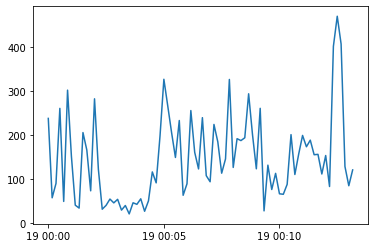

In [13]:
# Lets Plot the Data
plt.plot(finalData)

In [14]:
#Check whether the data is a stationary data or not

modifiedDF = finalData.diff(periods=1)
modifiedDF.dropna(inplace=True)
modifiedDF.head()

,feature
time,
2019-03-19 00:00:10,-180.04
2019-03-19 00:00:20,32.60
2019-03-19 00:00:30,170.22
2019-03-19 00:00:40,-211.05
2019-03-19 00:00:50,252.38


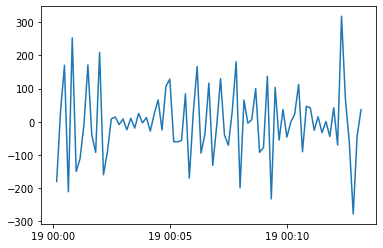

In [15]:
plt.plot(modifiedDF)

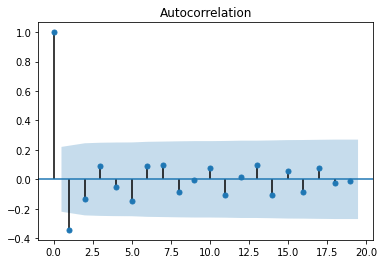

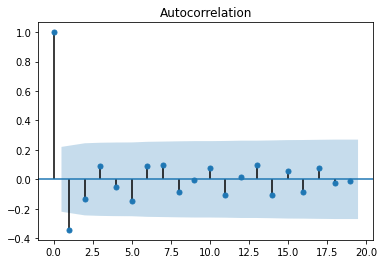

In [16]:
#Autocorrelation Plot --- To understand the behavior of data

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(modifiedDF)

#Out of 100% data, atleast 70% data must follow alternate pattern

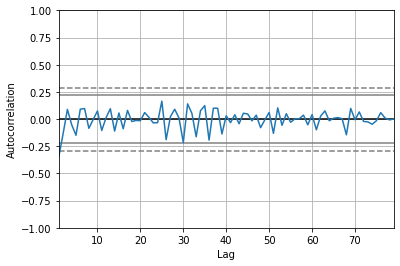

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(modifiedDF)

In [18]:
#Create Train Test Split

features = modifiedDF.values
train = features[0:64]
test = features[64:]

In [19]:
#ARIMA Model (Moving Average)

from statsmodels.tsa.arima_model import ARIMA

#p - period
#d - Integral wrt period
#q - Moving Average Period 

p = 2
d = 1
q = 1

modelARIMA = ARIMA(train, order=(p,d,q))
finalARIMAI = modelARIMA.fit()

In [20]:
# Checking the model Summary
print(finalARIMAI.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   63
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -370.911
Method:                       css-mle   S.D. of innovations             82.925
Date:                Tue, 09 Jun 2020   AIC                            751.823
Time:                        16:14:47   BIC                            762.538
Sample:                             1   HQIC                           756.037
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0221      0.271      0.082      0.935      -0.509       0.553
ar.L1.D.y     -0.6935      0.114     -6.068      0.000      -0.917      -0.469
ar.L2.D.y     -0.4548      0.114     -4.006      0.0

In [21]:
# # check the error score
finalARIMAI.aic

751.822534404034

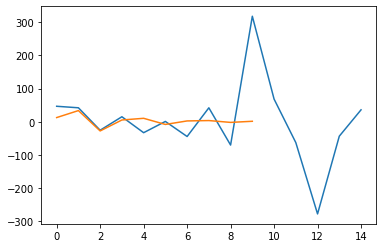

In [22]:
pred1 = finalARIMAI.forecast(steps=10)[0]
plt.plot(test)
plt.plot(pred1)